# Linear Regression from scratch to predict California house prices using Median Income (without Scikit-Learn), integrated with a Tkinter GUI.

### 1) Import Libraries and Load Data
In this step, we begin by importing the necessary Python libraries required for data handling, numerical computation, and visualization.

- **NumPy** is used for numerical operations and mathematical computations.
- **Matplotlib** is used for visualizing the relationship between median income and house prices.
- **Pandas**  helps in handling and exploring the dataset efficiently.

After importing the libraries, we load the **California Housing dataset**, which contains real-world housing data.

For this project:
- **Feature Used:** Median Income  
- **Target Variable:** House Price  

The dataset provides housing statistics across different districts in California.  
Our goal is to analyze the relationship between median income and house prices and prepare the data for building a Linear Regression model from scratch.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
df=pd.read_csv("D:\housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2) Basic EDA
In this step, we perform **Basic Exploratory Data Analysis (EDA)** to understand the structure and characteristics of the dataset before building the model.

The objective of EDA is to:

- Understand the dataset dimensions (number of rows and columns)
- Identify data types of each feature
- Check for missing or null values
- Observe basic statistical summaries
- Understand the distribution of the selected feature (Median Income)

We examine summary statistics such as:
- Mean
- Minimum and Maximum values
- Standard deviation

Since this project uses only **Median Income** as the input feature and **House Price** as the target variable, special attention is given to understanding their ranges and overall behavior.

Performing EDA helps ensure:
- The data is clean
- There are no unexpected anomalies
- The feature and target variables are suitable for Linear Regression

This step builds a strong foundation before moving to visualization and model implementation.

In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### 3) Handling Missing Values
During the Exploratory Data Analysis phase, we checked for missing values using the `isnull().sum()` function.

From this analysis, we observed that the **total_bedrooms** feature contains missing values, while the other columns are complete.

Handling missing values is an important preprocessing step because:
- Machine Learning models cannot handle null values directly.
- Missing values may negatively affect model performance.
- It ensures cleaner and more reliable training data.

Since this project focuses only on **Median Income** as the input feature, the missing values in **total_bedrooms** do not directly impact our model.

However, in a full-feature model, we would typically handle missing values using techniques such as:
- Replacing with mean or median values
- Removing rows with missing entries
- Using more advanced imputation methods

Addressing missing values ensures that the dataset remains consistent and suitable for model training.

In [27]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [28]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

### 4) Encode Categorical Feature
In this step, we handle categorical features in the dataset, specifically the **ocean_proximity** column.

Machine Learning models, including Linear Regression, require numerical input.  
However, **ocean_proximity** contains categorical text values such as:

- NEAR BAY  
- INLAND  
- NEAR OCEAN  
- ISLAND
   

Since these are non-numeric, they must be converted into numerical format before being used in a model.

A common approach for encoding categorical variables is:

- **One-Hot Encoding** → Creates separate binary columns for each category.
- **Label Encoding** → Assigns a unique number to each category (less suitable when no natural order exists).

For this project, although we are only using **Median Income** as the feature for prediction, understanding categorical encoding is important for building full-feature models in the future.

Proper encoding ensures:
- The model can process categorical information
- No artificial ranking is introduced between categories
- The dataset remains machine-learning compatible

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['ocean_proximity'], dtype='object')


In [11]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


### 5) Seprate Target and Features
In this step, we separate the **input feature (X)** and the **target variable (y)** from the dataset.

For this project:

- **Feature (X):** `median_income`
- **Target (y):** `median_house_value`

In [13]:
X = df["median_income"].values
y = df["median_house_value"].values

### 6) Manual Train Test split
In this step, we manually split the dataset into **training** and **testing** sets without using any external libraries such as Scikit-Learn.

This is done to better understand how data splitting works internally.

The purpose of splitting the dataset is:

- **Training Set:** Used to train the Linear Regression model and learn the optimal parameters (weight and bias).
- **Testing Set:** Used to evaluate how well the model performs on unseen data.

Instead of using built-in functions like `train_test_split()`, we manually:

- Determine the split ratio (80% training and 20% testing)
- Calculate the split index
- Slice the arrays accordingly

This approach reinforces the foundational understanding of:

- How datasets are partitioned
- Why model evaluation requires unseen data
- The importance of preventing data leakage

By implementing the split manually, we maintain full control over the process and strengthen our understanding of core Machine Learning concepts.

In [14]:
np.random.seed(42)
 
m=len(X)

indices= np.random.permutation(m)

#80% of the samples used for training 
train_size= int(0.8*m)

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = X[train_idx]
X_test = X[test_idx]

y_train = y[train_idx]
y_test = y[test_idx]

### 7) Feature Scaling 
In this step, we perform **Feature Scaling** to normalize the input feature before training the model.

Feature scaling is important because:

- It ensures that numerical values are on a similar scale.
- It helps Gradient Descent converge faster.
- It prevents large values from dominating the learning process.
- It improves numerical stability during training.

Since we are using **Median Income** as the only feature, scaling ensures that the optimization process becomes smoother and more efficient.

Common scaling techniques include:

- **Standardization (Z-score Normalization)** → Centers data around mean = 0 with standard deviation = 1.
- **Min-Max Scaling** → Rescales values to a range between 0 and 1.

In this project, scaling is applied manually to strengthen understanding of the mathematical process rather than relying on built-in libraries.

Even though this is a single-feature model, applying feature scaling demonstrates best practices in Machine Learning workflows and prepares the foundation for multi-feature models in the future.

In [15]:
mean = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

### 8) Scatter Plot of data
In this step, we visualize the relationship between **Median Income** and **Median House Value** using a scatter plot.

A scatter plot helps us:

- Observe the relationship between the feature and the target variable.
- Identify trends or patterns in the data.
- Detect possible outliers.
- Understand whether Linear Regression is a suitable model.

By plotting:

- **X-axis:** Median Income  
- **Y-axis:** Median House Value  

We can visually inspect whether a linear relationship exists between income and house prices.

From the plot, we observe a **positive correlation**, meaning that as median income increases, house prices generally tend to increase as well.

This visual confirmation supports our decision to apply **Linear Regression**, as the data shows an approximately linear trend.

Visualization is a crucial step before model training because it provides intuitive understanding of the data distribution and model suitability.

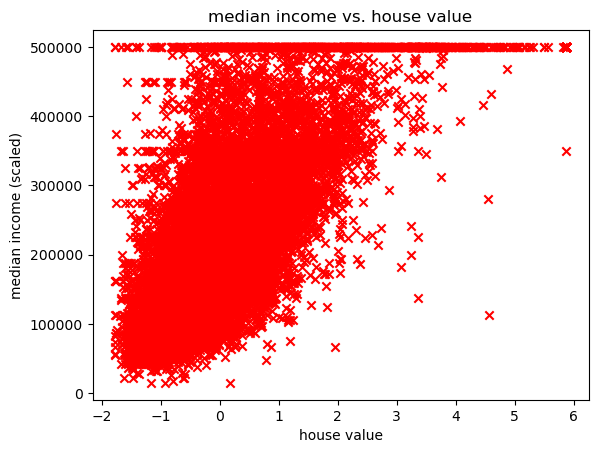

In [29]:
plt.scatter(X_train, y_train, marker='x', c='r') 

plt.title("median income vs. house value")

plt.ylabel('median income (scaled)')
plt.xlabel('house value')

plt.show()

### 9) Compute Cost
In this step, we manually implement the **Cost Function** for Linear Regression without using any external libraries.

The purpose of the cost function is to measure how well our model is performing. It calculates the average squared difference between the predicted house prices and the actual house prices.

For each training example:

- We compute the predicted value using the linear equation:  
  **Prediction = w × x + b**
- We calculate the difference between predicted and actual value.
- We square this difference to ensure all errors are positive.
- We sum the squared errors for all data points.
- Finally, we divide the total error by **2m**, where *m* is the number of training examples.

Dividing by **m** gives the average error, and the factor **2** simplifies calculations during gradient descent.

The cost function helps us understand:

- How far our predictions are from real values.
- Whether the model is improving during training.
- When gradient descent should stop.

A **smaller cost value** means the regression line fits the data better.

Implementing the cost function manually provides a deep understanding of how Linear Regression evaluates model performance internally.

In [17]:
def compute_cost(x, y, w, b): 
    
    m = x.shape[0] 
    total_cost = 0

    cost=0
    for i in range(m):
        f_wb = w*x[i]+b
        cost += (f_wb - y[i])**2
    
    total_cost = cost/(2*m)
    return total_cost

### 10) Compute Gradient
In this step, we manually compute the **gradients** of the cost function with respect to the model parameters — the weight (w) and bias (b).

The gradient tells us:

- In which direction the parameters should move
- How much they should change
- How to reduce the overall cost

For each training example:

- We calculate the prediction using the current values of w and b.
- We compute the error (prediction − actual value).
- We accumulate the partial derivatives for both w and b.
- Finally, we average these values over all training examples.

The gradient for:

- **w** measures how the cost changes with respect to the slope.
- **b** measures how the cost changes with respect to the intercept.

These gradients are essential for the next step — **Gradient Descent**, where we update w and b iteratively to minimize the cost.

Computing gradients manually strengthens understanding of:

- How optimization works
- Why parameters change during training
- The mathematical foundation behind Linear Regression

This step is crucial because it connects the cost function to the learning process of the model.

In [18]:
def compute_gradient(x, y, w, b): 
    
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db
    
 

### 11) Compute Gradient Descent
In this step, we implement **Gradient Descent**, the optimization algorithm used to minimize the cost function and find the optimal values of the weight (w) and bias (b).

Gradient Descent works by:

- Starting with initial values of w and b.
- Repeatedly updating them in small steps.
- Moving in the direction that reduces the cost.

At each iteration:

- We compute the gradients of the cost function.
- We update w and b using the learning rate.
- The cost gradually decreases as the parameters improve.

The **learning rate** controls how big each step is:
- If it is too large, the model may overshoot the minimum.
- If it is too small, training becomes very slow.
- A properly chosen learning rate ensures stable and smooth convergence.

Over multiple iterations, the regression line gradually adjusts itself to better fit the data.

This process continues until:
- The cost stops decreasing significantly, or
- A fixed number of iterations is completed.

Gradient Descent is the core learning mechanism of Linear Regression and many advanced machine learning algorithms. Implementing it manually provides a deep understanding of how models learn from data.

In [19]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 

    w = copy.deepcopy(w_in)
    b = b_in
    
    cost_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)  
        
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db  
        
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return w, b, cost_history


### 12) Initialize w, b and alpha
Before starting Gradient Descent, we initialize the model parameters and the learning rate.

- **w (weight)** represents the slope of the regression line.
- **b (bias)** represents the intercept of the regression line.
- **alpha (learning rate)** controls how much the parameters are updated in each iteration.

Initially, w and b are typically set to small values (often zero). At this stage, the model has not learned anything from the data.

The learning rate (alpha) is a crucial hyperparameter:

- If alpha is too large, the model may diverge and fail to converge to the minimum.
- If alpha is too small, training becomes very slow.
- A properly chosen alpha ensures smooth and stable convergence.

Initializing these values marks the starting point of the optimization process. From here, Gradient Descent iteratively updates w and b to minimize the cost function and improve predictions.

In [20]:
w = 0
b = 0

alpha = 0.01
iterations = 1000

w, b, cost_history = gradient_descent(X_train, y_train, w, b, alpha, iterations)

Iteration 0, Cost: 27529027460.4365
Iteration 100, Cost: 6702781200.117137
Iteration 200, Cost: 3912487497.6476874
Iteration 300, Cost: 3538644854.632585
Iteration 400, Cost: 3488557538.8734155
Iteration 500, Cost: 3481846856.593442
Iteration 600, Cost: 3480947761.5635376
Iteration 700, Cost: 3480827301.103742
Iteration 800, Cost: 3480811161.8505216
Iteration 900, Cost: 3480808999.5186186


### 13) Plot Cost vs. Iteration curve
In this step, we visualize how the cost function changes over multiple iterations of Gradient Descent.

Plotting **Cost vs Iterations** helps us:

- Monitor the learning progress of the model.
- Verify whether Gradient Descent is converging.
- Understand how quickly the model is minimizing error.

On the graph:

- The **X-axis** represents the number of iterations.
- The **Y-axis** represents the cost value.

Ideally, we should observe a steadily decreasing curve. This indicates that:

- The model parameters (w and b) are improving.
- The learning rate is appropriately chosen.
- The optimization process is working correctly.

If the cost increases or fluctuates heavily, it may suggest:
- The learning rate is too large.
- There may be an issue in gradient computation.

This visualization provides clear evidence that the model is successfully learning from the data and moving toward the minimum of the cost function.

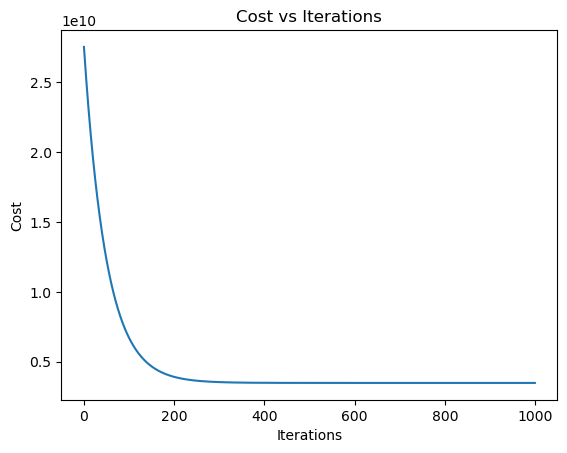

In [21]:
plt.plot(cost_history)
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


### 14) Evaluation Metrics
In this step, we evaluate the performance of our Linear Regression model using standard regression metrics.

Evaluation metrics help us understand how well the model predicts house prices on unseen test data.

### 1️⃣ Mean Squared Error (MSE)

Mean Squared Error measures the average of the squared differences between predicted and actual values.

- It penalizes larger errors more heavily.
- A lower MSE indicates better model performance.
- Since errors are squared, the value is always non-negative.

---

### 2️⃣ Root Mean Squared Error (RMSE)

Root Mean Squared Error is simply the square root of MSE.

- It brings the error back to the original unit of the target variable.
- It is easier to interpret compared to MSE.
- A lower RMSE means predictions are closer to actual values.

---

### 3️⃣ R² Score (Coefficient of Determination)

R² Score measures how well the model explains the variance in the target variable.

- It ranges between 0 and 1 (sometimes negative for very poor models).
- A value closer to 1 indicates better performance.
- It tells us how much of the variation in house prices is explained by median income.

---

Using these metrics together provides a comprehensive evaluation of the model’s accuracy and reliability.

Since this project uses only one feature (Median Income), the performance is expected to be limited compared to multi-feature models. However, these metrics help quantify how well the simple Linear Regression model performs.

In [22]:
y_pred = w*X_test + b

In [23]:
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)

ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_res = np.sum((y_test - y_pred)**2)

r2 = 1 - (ss_res / ss_total)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 7210389173.390579
RMSE: 84914.01046582701
R2 Score: 0.4643048355883176


### 15) Linear Regression Fit
In this step, we fit the Linear Regression model to the training data using the optimized values of the weight (w) and bias (b) obtained from Gradient Descent.

Fitting the model means:

- The algorithm has learned the best possible values of w and b.
- The regression line is now positioned to minimize the cost function.
- The model can generate predictions for new input values.

The learned equation of the line can be represented as:

Prediction = w × (Median Income) + b

This fitted line represents the relationship between median income and house prices in the dataset.

Once the model is fitted:

- We can visualize the regression line along with the scatter plot.
- We can use the model to predict house prices for unseen data.
- We can evaluate how well the line captures the overall trend.

Since this is a single-feature Linear Regression model, the result is a straight line that best approximates the relationship between income and housing prices.

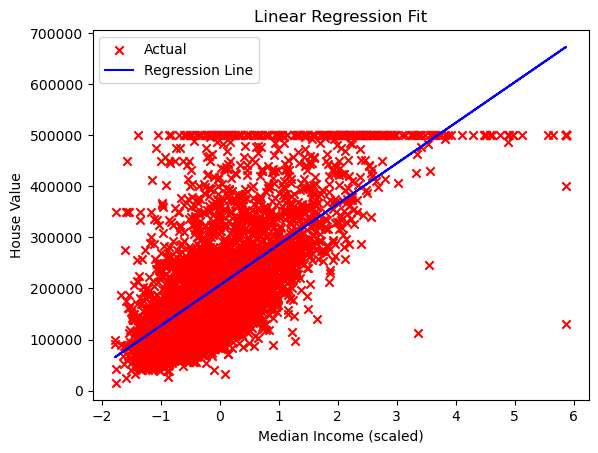

In [24]:
plt.scatter(X_test, y_test, label="Actual",marker='x', c='r')
plt.plot(X_test, y_pred, color='blue', label="Regression Line")
plt.xlabel("Median Income (scaled)")
plt.ylabel("House Value")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


## PREDICTION OF HOUSE VALUE AND GUI IMPLEMENTAION
In this final step, we use the trained Linear Regression model to predict house prices and integrate it with a graphical user interface (GUI) using Tkinter.

Once the model has learned the optimal values of w and b, it can make predictions for any given median income value using the learned linear equation.

The GUI allows users to:

- Enter a median income value.
- Click a button to generate a prediction.
- View the estimated house price instantly.

This transforms the model from a theoretical implementation into an interactive application.

The purpose of integrating a GUI is to:

- Make the model user-friendly.
- Demonstrate practical application of Machine Learning.
- Connect backend ML logic with frontend interaction.

The predicted output represents the estimated house value based on the relationship learned during training.

This step completes the end-to-end workflow:

- Data preprocessing  
- Model implementation from scratch  
- Optimization using Gradient Descent  
- Evaluation using regression metrics  
- Real-time prediction through a GUI  

This demonstrates both conceptual understanding of Linear Regression and practical implementation skills in building interactive ML applications.

In [ ]:
import tkinter as tk
from tkinter import messagebox


# Function to predict house value
def predict_price():
    try:
        user_income = float(entry.get())
        
        # Scale using training mean & std
        scaled_income = (user_income - mean) / std
        
        # Predict house value
        prediction = w * scaled_income + b
        
        # Show message box with result
        messagebox.showinfo(
            "Predicted House Value",
            f"Your predicted California house value is:\n\n${float(prediction):,.2f}"
        )
        
    except:
        messagebox.showerror("Error", "Please enter a valid number")

# Create main window
root = tk.Tk()
root.title("California House Price Predictor")
root.geometry("400x250")  # Bigger window
root.configure(bg="#87CEFA")  # Light blue background

# Title label
title_label = tk.Label(
    root, 
    text="California House Price Predictor", 
    font=("Arial", 16, "bold"), 
    bg="#87CEFA"
)
title_label.pack(pady=10)

# Instruction label
instruction_label = tk.Label(
    root, 
    text="Enter Median Income (in thousands of $):", 
    font=("Arial", 12),
    bg="#87CEFA"
)
instruction_label.pack(pady=5)

# Entry box
entry = tk.Entry(root, font=("Arial", 12), width=20)
entry.pack(pady=5)

# Predict button
button = tk.Button(
    root, 
    text="Predict", 
    command=predict_price,
    font=("Arial", 12, "bold"),
    bg="#FFD700",  # Gold color
    width=15
)
button.pack(pady=15)

# Run the window
root.mainloop()
